In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style = 'whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

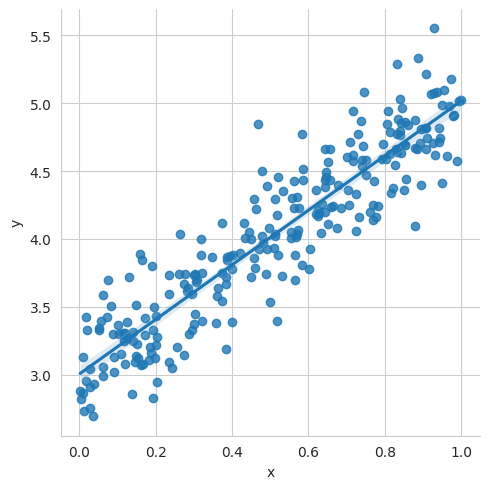

In [ ]:
m= 2 # slope
c= 3 # intercept
x = np.random.rand(256)

noise = np.random.randn(256)/4
y = m*x + c + noise

df = pd.DataFrame()
df['x'] = x
df['y'] = y

sns.lmplot(x = 'x', y = 'y', data = df)


In [ ]:
# linear regression with PyTorch
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
# y= mx+c
x = torch.tensor([[1.0], [2.0],[3.0],[4.0]])
y = torch.tensor([[5.0],[6.0],[7.0],[8.0]])


In [ ]:
# model
model = nn.Linear(in_features = 1, out_features = 1)

In [ ]:
# loss and optim
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
# training loop
for epoch in range(1000):
    # forward pass
    y_pred = model(x)

    # loss
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    # backward pass
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.item()}')

Epoch: 0, Loss: 0.004265258088707924
Epoch: 50, Loss: 0.0031602620147168636
Epoch: 100, Loss: 0.0023415773175656796
Epoch: 150, Loss: 0.0017349421977996826
Epoch: 200, Loss: 0.0012854808010160923
Epoch: 250, Loss: 0.0009524499764665961
Epoch: 300, Loss: 0.0007057004258967936
Epoch: 350, Loss: 0.000522876565810293
Epoch: 400, Loss: 0.00038741726893931627
Epoch: 450, Loss: 0.00028705751174129546
Epoch: 500, Loss: 0.0002126886392943561
Epoch: 550, Loss: 0.00015759278903715312
Epoch: 600, Loss: 0.00011677190195769072
Epoch: 650, Loss: 8.652382530272007e-05
Epoch: 700, Loss: 6.410593050532043e-05
Epoch: 750, Loss: 4.749754589283839e-05
Epoch: 800, Loss: 3.519128222251311e-05
Epoch: 850, Loss: 2.6073032131535e-05
Epoch: 900, Loss: 1.932036320795305e-05
Epoch: 950, Loss: 1.4314185136754531e-05


In [ ]:
# final
print(f'Final weight: {model.weight.item()}, Final bias: {model.bias.item()}')

Final weight: 1.0027105808258057, Final bias: 3.9920308589935303


In [ ]:
# linear regr => pytorch => class
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

In [ ]:
from matplotlib.animation import FuncAnimation

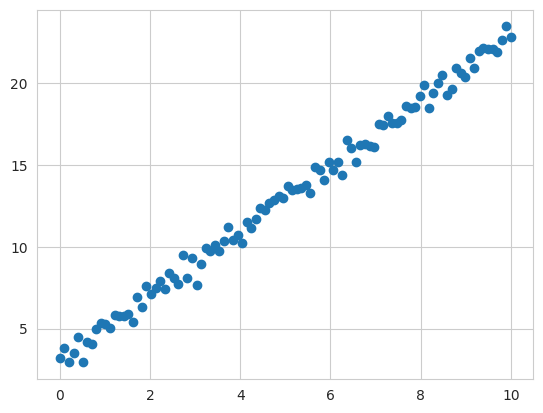

In [ ]:
# x_train = torch.tensor([[1.0], [2.0],[3.0],[4.0]])
# y_train = torch.tensor([[5.0],[6.0],[7.0],[8.0]])

# x_train = x.reshape(-1,1).astype(np.float32)
# y_train = y.reshape(-1,1).astype(np.float32)

# x_train = x.reshape(-1,1).type(torch.float32)
# y_train = y.reshape(-1,1).type(torch.float32)

# generate data
x = torch.linspace(0, 10, 100).view(-1,1) # shape (100,1)
y = 2 * x + 3 + torch.randn(x.size())*.5 # shape (100,1)
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [ ]:
# class
class LinearRegression_Ajay(nn.Module):
    # def __init__(self, input_size, output_size):
    #     super(LinearRegression_Ajay, self).__init__()
    #     self.linear = nn.Linear(input_size, output_size)

    def __init__(self):
        super(LinearRegression_Ajay, self).__init__()
        self.linear = nn.Linear(1,1)


    def forward(self, x):
        out = self.linear(x)
        return out



In [ ]:
# input_size = x_train.shape[1]
# output_size = y_train.shape[1]
#input_size, output_size(1,1)
model = LinearRegression_Ajay()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)



In [ ]:
# training loop
for epoch in range(500):
    # forward pass
    y_pred = model(x)

    # loss
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    # backward pass
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.item()}')

Epoch: 0, Loss: 358.400146484375
Epoch: 50, Loss: 2.0137205123901367
Epoch: 100, Loss: 1.3165678977966309
Epoch: 150, Loss: 0.8927220702171326
Epoch: 200, Loss: 0.6350380182266235
Epoch: 250, Loss: 0.47837406396865845
Epoch: 300, Loss: 0.38312792778015137
Epoch: 350, Loss: 0.3252212405204773
Epoch: 400, Loss: 0.2900157868862152
Epoch: 450, Loss: 0.26861199736595154


In [ ]:
# def plot_current_fit(title = ""):
#   plt.figure(figsize = (12,4))
#   plt.title(title)
#   plt.scatter(x,y, s = 8)
#   w1 = w.data[0][0]
#   b1 = b.data[0]
#   x1 = np.array([0,1])
#   y1 = w1*x1 + b1
#   plt.plot(x1,y1, 'r')
#   plt.xlabel("x(input)")
#   plt.ylabel("y(output)")
#   plt.legend()
# plot_current_fit("Linear Regression")

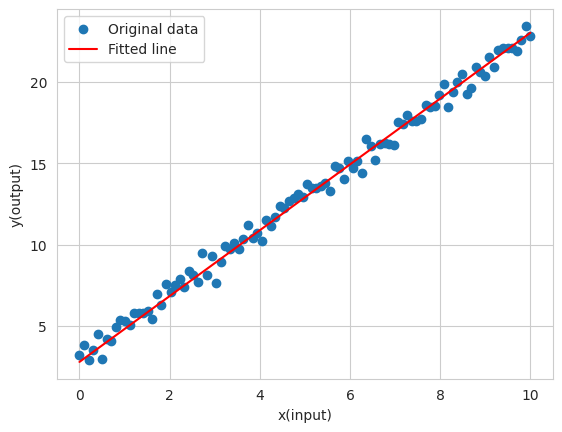

In [ ]:
predicted = model(x).detach()
plt.scatter(x.numpy(), y.numpy(), label='Original data')
plt.plot(x.numpy(), predicted.numpy(), 'r', label='Fitted line')
plt.xlabel("x(input)")
plt.ylabel("y(output)")
plt.legend()
plt.show()

In [ ]:
# logitstic with Pytorch
X = torch.tensor([[1.0],[2.0],[3.0],[4.0],[5.0]])
Y = torch.tensor([[0.0],[0.0],[0.0],[1.0],[1.0]])

In [ ]:
#model
model_log = nn.Sequential(nn.Linear(1,1), nn.Sigmoid())

In [ ]:
# loss and opti
criterion = nn.BCELoss()
optimizer = optim.SGD(model_log.parameters(), lr = 0.1)

In [ ]:
# training loop
for epoch in range(500):
    # forward pass
    y_pred = model_log(X)

    # loss
    loss = criterion(y_pred, Y)
    optimizer.zero_grad()
    # backward pass
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.item()}')


Epoch: 0, Loss: 0.8439942598342896
Epoch: 50, Loss: 0.5067132711410522
Epoch: 100, Loss: 0.4356571137905121
Epoch: 150, Loss: 0.3850427269935608
Epoch: 200, Loss: 0.3474031090736389
Epoch: 250, Loss: 0.31834232807159424
Epoch: 300, Loss: 0.2951909005641937
Epoch: 350, Loss: 0.27626410126686096
Epoch: 400, Loss: 0.26045674085617065
Epoch: 450, Loss: 0.24701747298240662


In [ ]:
# option 1
test = torch.tensor([[3.5]])
with torch.no_grad():
    y_pred = model_log(test)
    print(y_pred)

tensor([[0.5655]])


In [ ]:
# option 2
test = torch.tensor([[3.5]])
with torch.no_grad():
    y_pred = model_log(test)
    print("probability of passing: ", y_pred.item())
    print("Class prediction: ", 1 if y_pred.item() > 0.5 else 0)
    #print(y_pred)

probability of passing:  0.5655422210693359
Class prediction:  1
